In [31]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
plt.style.use('ggplot')

# Numpy: Efficient Array Compuation in Python

**Numpy** is the library behind almost all of the numerical and scientific computing in python.  It's quite true that if it were not for numpy, Python would not be a player in the data science world.

**Note**: It's pronounced **num-pie** as in **pie-thon**, not **num-pee**.

Numpy's major feature is its `array` data type (technically, it's called an `ndarray`, but everyone just calls them arrays).

Numpy arrays, on the face of it, look a lot like python lists:

In [3]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

And you can do pretty much anything to a numpy array that you could do to a list:

In [4]:
x[2]

2

In [5]:
x[:5]

array([0, 1, 2, 3, 4])

In [6]:
x[1:8:2]

array([1, 3, 5, 7])

In [7]:
x[0] = 100
x

array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])

But, under the hood, very different things are going on...

  - Numpy arrays can hold one and only one type of data.
  - Numpy arrays are **super efficient** both in terms of memory footprint **and** computational efficiency.
  - Numpy arrays have a size, and the size cannot be changed.
  - Numpy arrays have a **shape**, which allows them to be multi-dimensional (examples forthcoming).

## Constraints on Arrays

One major difference between arrays and lists is that arrays **cannot be extended**.

In [9]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x.append(10)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

Numpy arrays have a fixed size, which cannot be changed.

In [44]:
x.size

10

So as a consequence, if you want to create a numpy array to hold some data, you **need to know how much array you need at the time the array is created**.

## Reshaping Arrays

Although the total size of an array **cannot** be changed, the **shape** of the array can be changed, **as long as this change of shape does not create or destroy elements**.

In [184]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [185]:
x.reshape((5, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [186]:
x.reshape((2, 5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [187]:
x.reshape((10, 1))

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

Reshaping is very efficient, but it does **not** make a copy of the array!

In [190]:
y = x.reshape((2, 5))
y

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [192]:
y[0, 0] = 999
y

array([[999,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9]])

In [193]:
x

array([999,   1,   2,   3,   4,   5,   6,   7,   8,   9])

To make a copy of an array, use the `copy` method:

In [198]:
x = np.arange(10)
y = x.copy()
y[0] = 999

In [200]:
y

array([999,   1,   2,   3,   4,   5,   6,   7,   8,   9])

In [199]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Creating Numpy Arrays

#### np.zeros

`np.zeros` creates a new array of a given size, and fills it with zeros.

In [13]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

You can also create a **multi-dimensional** array by passing a tuple as the shape:

In [15]:
np.zeros((5, 3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

#### np.linspace

`np.linspace` creates an equally spaced grid of numbers between two endpoints.

In [18]:
np.linspace(0, 1, num=11)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [19]:
np.linspace(0, 10, num=11)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [20]:
np.linspace(0, 1, num=21)

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ])

#### np.arange

`np.arange` is just like the built in `range`, but it makes an array.

In [21]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
np.arange(2, 10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

#### np.random.uniform and np.random.normal

The `np.random` subpackage contains some functions for creating arrays of random numbers.  These two are the most useful, but there are more!

In [24]:
np.random.uniform(low=0.0, high=10.0, size=10)

array([ 1.4841032 ,  9.42113698,  0.91449638,  1.28847043,  7.51221638,
        4.25550107,  2.41415252,  8.56521156,  4.77715091,  5.35109318])

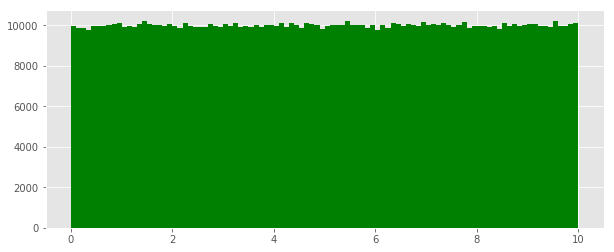

In [35]:
unif = np.random.uniform(low=0.0, high=10.0, size=10**6)

fig, ax = plt.subplots(figsize=(10, 4))
_ = ax.hist(unif, bins=100, color="green")

In [36]:
np.random.normal(loc=0.0, scale=1.0, size=10)

array([ 0.12502236,  0.16875722,  0.44671909, -2.2100106 , -0.31170672,
       -0.14236413,  0.85534105, -0.70473603,  0.13206415,  1.47905124])

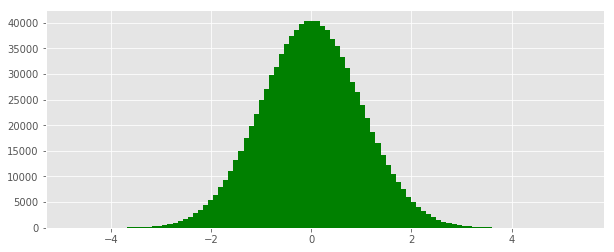

In [37]:
unif = np.random.normal(loc=0.0, scale=1.0, size=10**6)

fig, ax = plt.subplots(figsize=(10, 4))
_ = ax.hist(unif, bins=100, color="green")

## Broadcasting

#### Boradcasting: Equal Length Arrays

One of the most useful features of arrays is called **broadcasting**.  At its most basic, boradcasting means that any arithmetic operation applied to an array is interpreted as being applied **element by element**.

In [103]:
x = np.array([1, 2, 3, 4, 5,  6])
y = np.array([2, 4, 6, 8, 10, 12])

In [104]:
x + y

array([ 3,  6,  9, 12, 15, 18])

In [105]:
x - y

array([-1, -2, -3, -4, -5, -6])

In [106]:
x * y

array([ 2,  8, 18, 32, 50, 72])

In [107]:
y / x

array([ 2.,  2.,  2.,  2.,  2.,  2.])

In [108]:
y % x

array([0, 0, 0, 0, 0, 0])

#### Broadcasting With a Constant

This is all pretty clear cut when the arrays have the **same shape**, but it's more powerful that that.

You can replace one of the arrays with a **constant** and that constant will be treated as if it were an entire array:

In [109]:
2 * x

array([ 2,  4,  6,  8, 10, 12])

In [110]:
y / 2

array([ 1.,  2.,  3.,  4.,  5.,  6.])

In [111]:
x % 2

array([1, 0, 1, 0, 1, 0])

You can also broadcast with comparison operators, this is **very useful** when combined with something we'll talk about later:

In [118]:
x <= 3

array([ True,  True,  True, False, False, False], dtype=bool)

In [120]:
y / 2 == x

array([ True,  True,  True,  True,  True,  True], dtype=bool)

#### Broadcasting Multi-dimensional Arrays

Broadcasting also works for multi-dimensional arrays, but it takes some practice and getting used to.

In [143]:
x = np.ones((5, 4))
x

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

The constant case is the same as it ever was:

In [144]:
2 * x

array([[ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.]])

But now things get pretty intersting.  If you broadcast with a one dimensional array, cool stuff happens:

In [148]:
b = np.array([1, 2, 3, 4])
x * b

array([[ 1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.]])

Note that `b` must have the correct shape for this to happen.  We **need** the length of `b` to **match** the last dimension of `x`.

In [149]:
print("Shape of x", x.shape)
print("Shape of b", b.shape)

Shape of x (5, 4)
Shape of b (4,)


To get the same behaviour, but with the **rows** scaled, we need to do some gymnsatics.

In [154]:
b = np.array([1, 2, 3, 4, 5])
x * b

ValueError: operands could not be broadcast together with shapes (5,4) (5,) 

To get this to work, we need to rehsape `b`.

In [155]:
b_reshaped = b.reshape((5, 1))

Note how the first dimensions of the arrays match now:

In [158]:
print("Shape of x         :", x.shape)
print("Shape of b_reshaped:", b_reshaped.shape)

Shape of x         : (5, 4)
Shape of b_reshaped: (5, 1)


As long as the dimensions **either** match, or one of them is **exactly one**, the arrays will broadcast:

In [159]:
x * b_reshaped

array([[ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.]])

The unit length dimensions are **stretched** to until the arrays have the same shape, then they are broadcast.

## Indexing Numpy Arrays

Numpy arrays support all the usual indexing shenanigans that lists do, so we wont comment on those any more.

#### Indexing Multi-dimensional Arrays

The usual list style indexing extends to multi-dimensional arrays:

In [122]:
x = np.arange(20).reshape((5, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [123]:
# First two rows.
x[:2, :]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [124]:
# First two columns.
x[:, :2]

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13],
       [16, 17]])

In [125]:
# First two rows and first two columns
x[:2, :2]

array([[0, 1],
       [4, 5]])

In [126]:
# Even numbered rows and columns
x[::2, ::2]

array([[ 0,  2],
       [ 8, 10],
       [16, 18]])

You can combine this with assignment to surgically alter arrays:

In [127]:
x[:2, :2] = 999
x

array([[999, 999,   2,   3],
       [999, 999,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15],
       [ 16,  17,  18,  19]])

#### Fancy Indexing

You can index an array with **another array** (or a list), and this is often referred to as **fancy indexing**.

In [128]:
x = np.arange(0, 20, 2)
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [129]:
x[[0, 0, 1, 1, 2, 2]]

array([0, 0, 2, 2, 4, 4])

In [130]:
colors = np.array(["red", "blue"])
colors[[0, 0, 1, 1, 0, 0, 1, 1]]

array(['red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue'], 
      dtype='<U4')

This also works for multi-dimensional arrays, but the results can be confusing.

In [166]:
x = np.arange(20).reshape((5, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [167]:
x[[0, 1, 2, 3], [0, 1, 2, 3]]

array([ 0,  5, 10, 15])

Again, you can use this to do surgery:

In [168]:
x[[0, 1, 2, 3], [0, 1, 2, 3]] = 999
x

array([[999,   1,   2,   3],
       [  4, 999,   6,   7],
       [  8,   9, 999,  11],
       [ 12,  13,  14, 999],
       [ 16,  17,  18,  19]])

#### Boolean Indexing

If you have an array of booleans (i.e. `True`'s and `False`'s), you can use these as indexes too.  You'll get a new array containing only those elements that line up with a `True` in your index array.

In [78]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [79]:
x[[True, True, False, False, True, True, False, False, True, True]]

array([0, 1, 4, 5, 8, 9])

This is **very** useful when combined with broadcasting to create boolean index arrays.

In [80]:
x % 2 == 0

array([ True, False,  True, False,  True, False,  True, False,  True, False], dtype=bool)

In [81]:
x[x % 2 == 0]

array([0, 2, 4, 6, 8])

Note that it's easy to do the wrong thing here!

In [82]:
x[x % 2]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

Both of these are useful, depending on your intention.

You can also use this technique to select specific rows or columns in a multi-dimensional array:

# for this consider using a random array

In [178]:
x = np.random.randint(0, 10, (6,10))
x

array([[7, 1, 3, 8, 6, 9, 5, 2, 4, 6],
       [6, 8, 0, 8, 9, 0, 6, 3, 4, 2],
       [8, 9, 1, 1, 3, 1, 6, 3, 9, 6],
       [8, 8, 7, 2, 1, 4, 6, 6, 9, 1],
       [0, 3, 9, 5, 1, 7, 6, 6, 2, 8],
       [4, 3, 8, 1, 5, 9, 6, 5, 1, 0]])

# and then do you can work your way to cool stuff like this

In [179]:
x[:, x[0] > 5]

array([[7, 8, 6, 9, 6],
       [6, 8, 9, 0, 2],
       [8, 1, 3, 1, 6],
       [8, 2, 1, 4, 1],
       [0, 5, 1, 7, 8],
       [4, 1, 5, 9, 0]])

In [136]:
x = np.arange(20).reshape((5, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [137]:
x[[True, False, True, True, False], :]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [138]:
x[:, [False, True, False, True]]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11],
       [13, 15],
       [17, 19]])

And, of course, this allows for some surgical operations:

In [139]:
x[[True, False, True, True, False], :] = 999
x

array([[999, 999, 999, 999],
       [  4,   5,   6,   7],
       [999, 999, 999, 999],
       [999, 999, 999, 999],
       [ 16,  17,  18,  19]])